### **Appliances Energy Prediction :**

Name : Veenalakshmi P V

Organization : Entri Elevate

Date : Evaluation Date





# **1. Overview of the Problem Statement :**
This project focuses on predicting appliance energy consumption using environmental and indoor conditions. The problem revolves around building a machine learning model that utilizes features such as temperature, humidity, and weather conditions to forecast energy usage in a supervised regression framework.

# 2. **Objective:**

The primary objective of this project is to predict the energy consumption of appliances (Appliances) using various environmental and indoor sensor data, such as temperature, humidity, and weather conditions.

# 3. **Data Description:**

# **Source :**
Data Set Link : https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction

The dataset appears to be related to energy consumption and environmental conditions, commonly used in research and modeling tasks.

# **Features** :

**Numerical Features:**

**T1, T2, T3, T4, T5, T6, T7, T8, T9:** Temperature readings at different time points or locations.

**RH_1, RH_2, RH_3, etc.:** Relative humidity readings at different times or locations.

**Appliances:** Power consumption by appliances (target variable).

**lights:** Power consumption by lights.

**T_out:** External temperature.

**Press_mm_hg:** Atmospheric pressure.

**Windspeed:** Wind speed.

**Visibility:** Visibility in the area.

**Tdewpoint:** Dew point.

**rv1, rv2:** Random variables used for noise in data collection.

**Categorical Features:**

**day_of_week:** Could represent the day of the week.

**appliance_type:** Type of appliance.

**location:** Location of the appliances or measurements.

**weather_condition:** Type of weather.

**date:** Timestamps for when each measurement was recorded.

## 4. Data Collection and Exploration :

# **Load The Data set :**

In [50]:
import pandas as pd

#Load the dataset

df = pd.read_csv("/content/drive/MyDrive/energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [51]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [52]:
df.shape

(19735, 29)

# **Info and Describe : **

In [53]:
# Display the info of the dataset
print(df.info())

# Check column data types
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# **Gain insights into the data distribution, relationships, and potential patterns.**

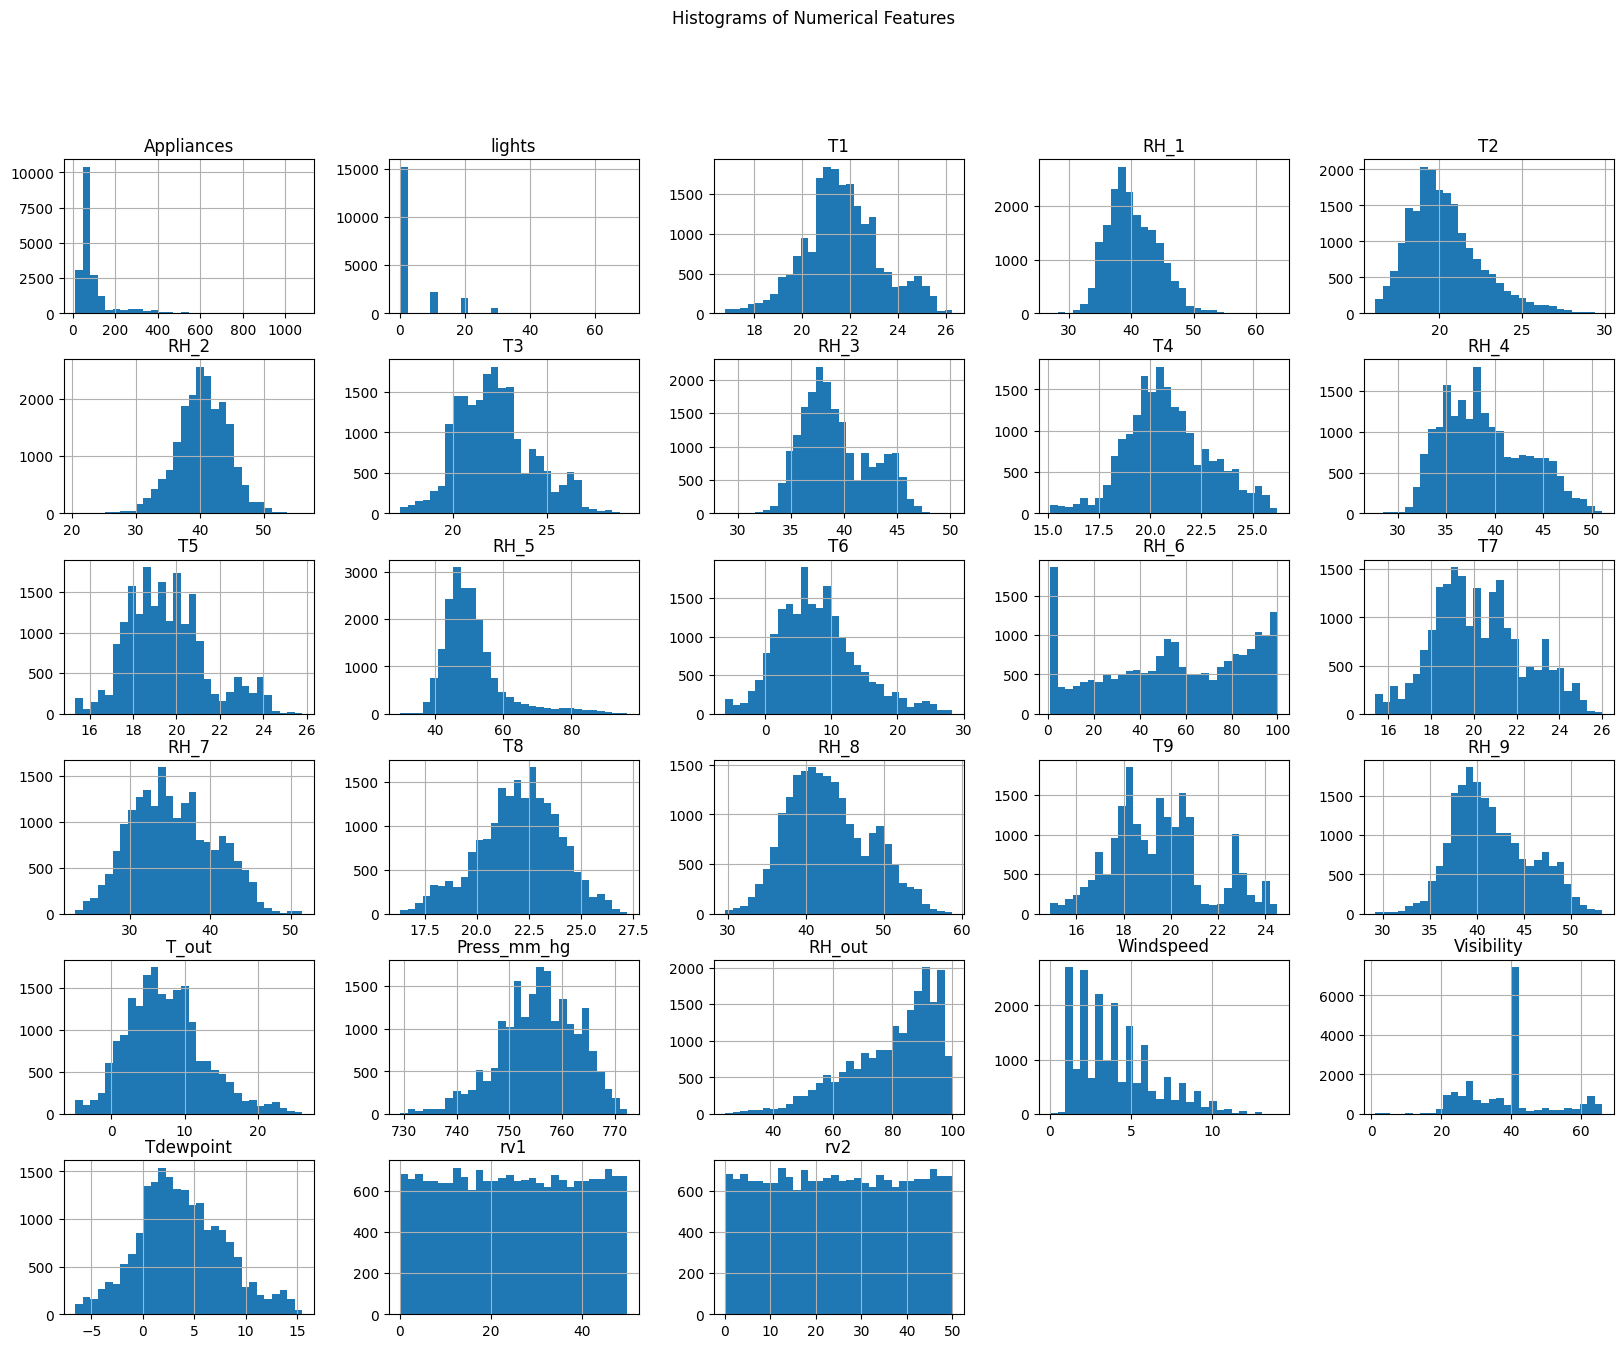

In [9]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of Numerical Features")
plt.show()


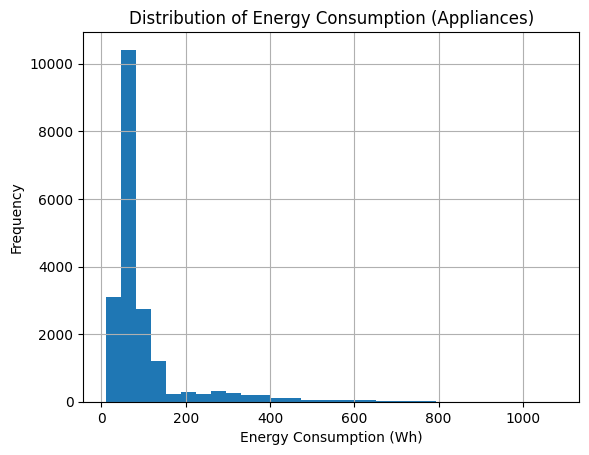

In [10]:
import matplotlib.pyplot as plt

# Histogram for the target variable
df['Appliances'].hist(bins=30)
plt.title('Distribution of Energy Consumption (Appliances)')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()


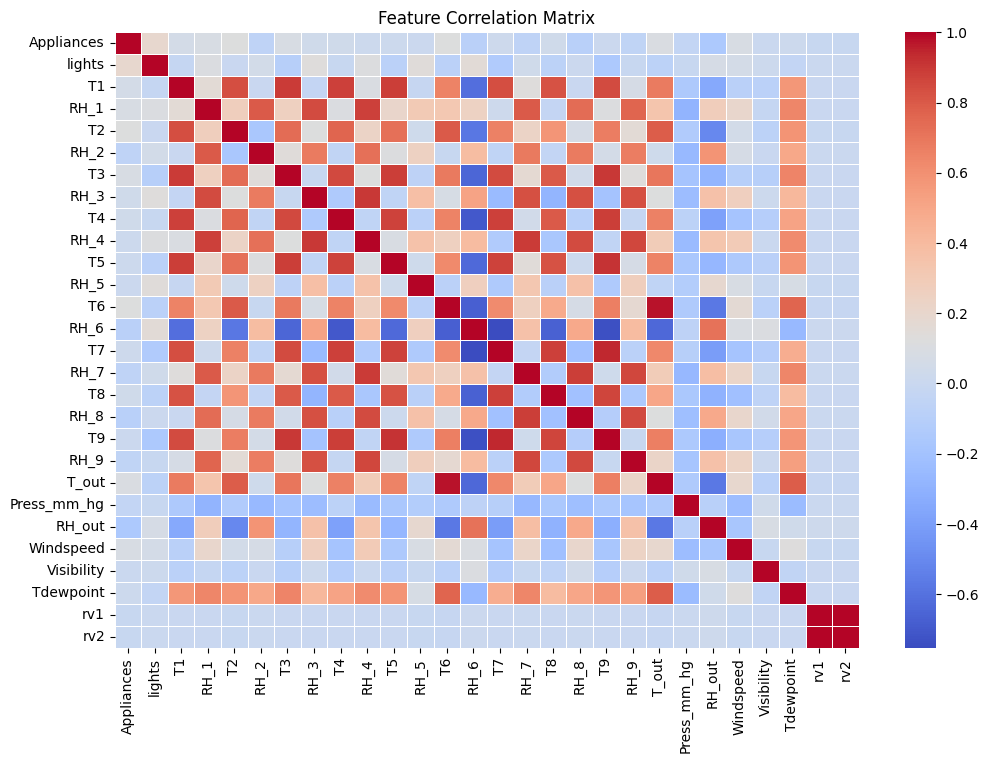

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numerical_df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


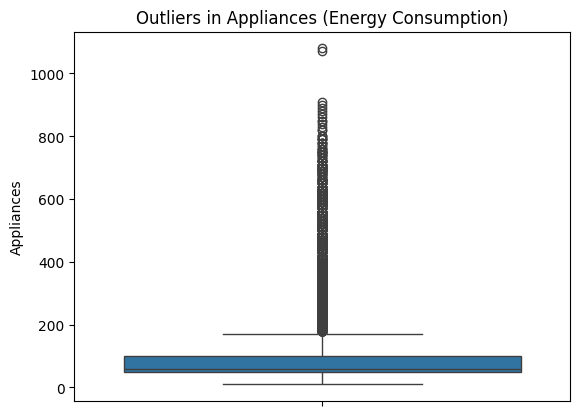

In [13]:
sns.boxplot(df['Appliances'])
plt.title('Outliers in Appliances (Energy Consumption)')
plt.show()


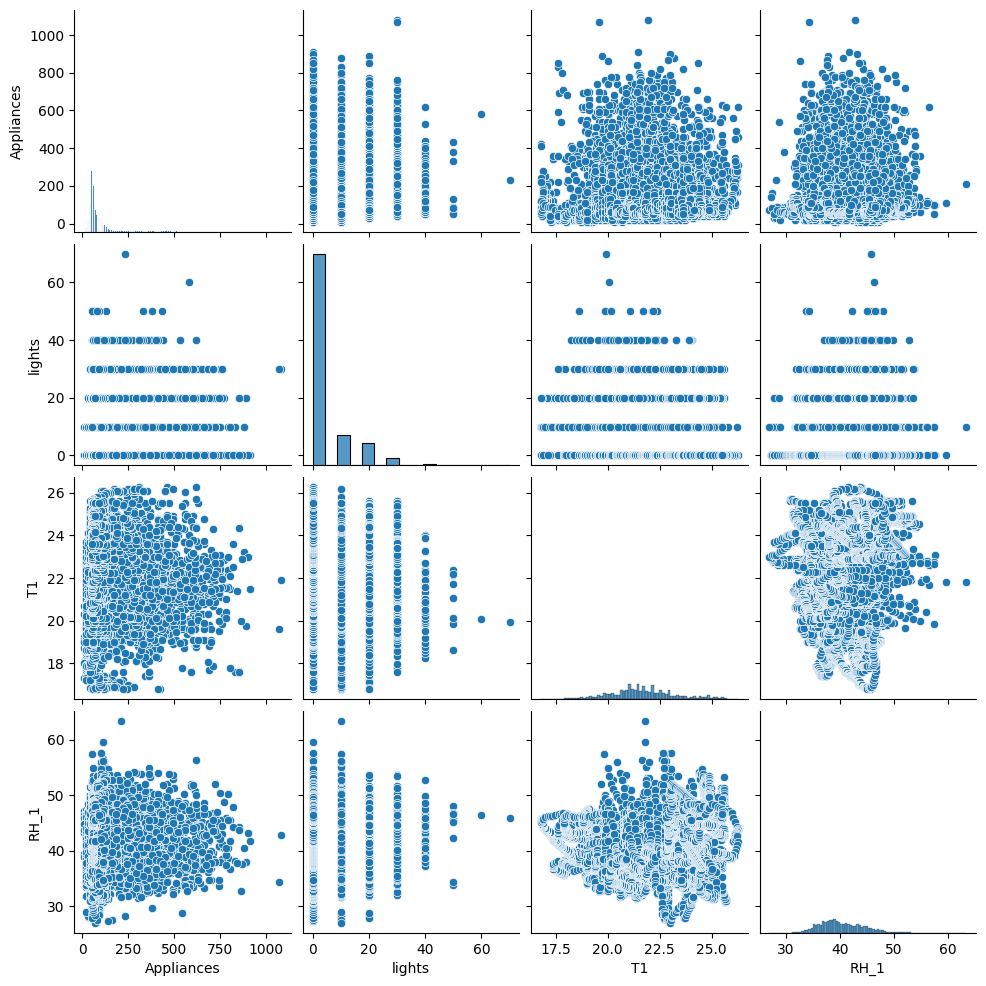

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Appliances', 'lights', 'T1', 'RH_1']])  # Replace with relevant columns
plt.show()


# **5. Data Preprocessing - Data Cleaning :**
       



# **Handle missing values using appropriate imputation techniques.**


In [54]:

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)





Missing Values in Each Column:
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


# This Dataset Have No Missing Values  

In [55]:
num_cols = df.select_dtypes(include='number').columns
print("Total Numerical Features:",num_cols.shape)
print("Numeric Features:",num_cols)

Total Numerical Features: (28,)
Numeric Features: Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [56]:
cat_cols = df.select_dtypes(include='object').columns
print("Total Categorical Features:",cat_cols.shape)
print("Categorical Features:",cat_cols)

Total Categorical Features: (1,)
Categorical Features: Index(['date'], dtype='object')


In [57]:
df.duplicated().sum()

0

No duplicated values found.



In [58]:
df.isnull().sum()


,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0




### **No Null Values**

In [59]:
df.columns


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

# Handle Outliers :
Use methods like IQR or Z-score to detect and treat outliers.

In [60]:
# Calculate Q1, Q3, and IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))
print("Number of outliers in each column:")
print(outliers.sum())

Number of outliers in each column:
Appliances     2138
lights         4483
T1              515
RH_1            146
T2              546
RH_2            235
T3              217
RH_3             15
T4              186
RH_4              0
T5              179
RH_5           1330
T6              515
RH_6              0
T7                2
RH_7             42
T8               71
RH_8             17
T9                0
RH_9             21
T_out           436
Press_mm_hg     219
RH_out          239
Windspeed       214
Visibility     2522
Tdewpoint        10
rv1               0
rv2               0
dtype: int64


In [61]:
# Define numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Function to cap outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Clip the values to the lower and upper bounds
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping to all numerical columns
for column in numerical_cols:
    cap_outliers(df, column)

print("Outliers capped successfully!")


Outliers capped successfully!


In [62]:
def remove_outliers_iqr(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Remove outliers for all numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

# Check shape of the cleaned data
print(f"Shape of data after removing outliers: {df.shape}")


Shape of data after removing outliers: (19735, 29)


In [25]:
df1 = df.copy()

In [64]:
# Cap outliers to the threshold values (IQR method)
df1[num_cols] = df1[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

print("Shape after capping outliers:", df1[num_cols].shape)

Shape after capping outliers: (19735, 28)


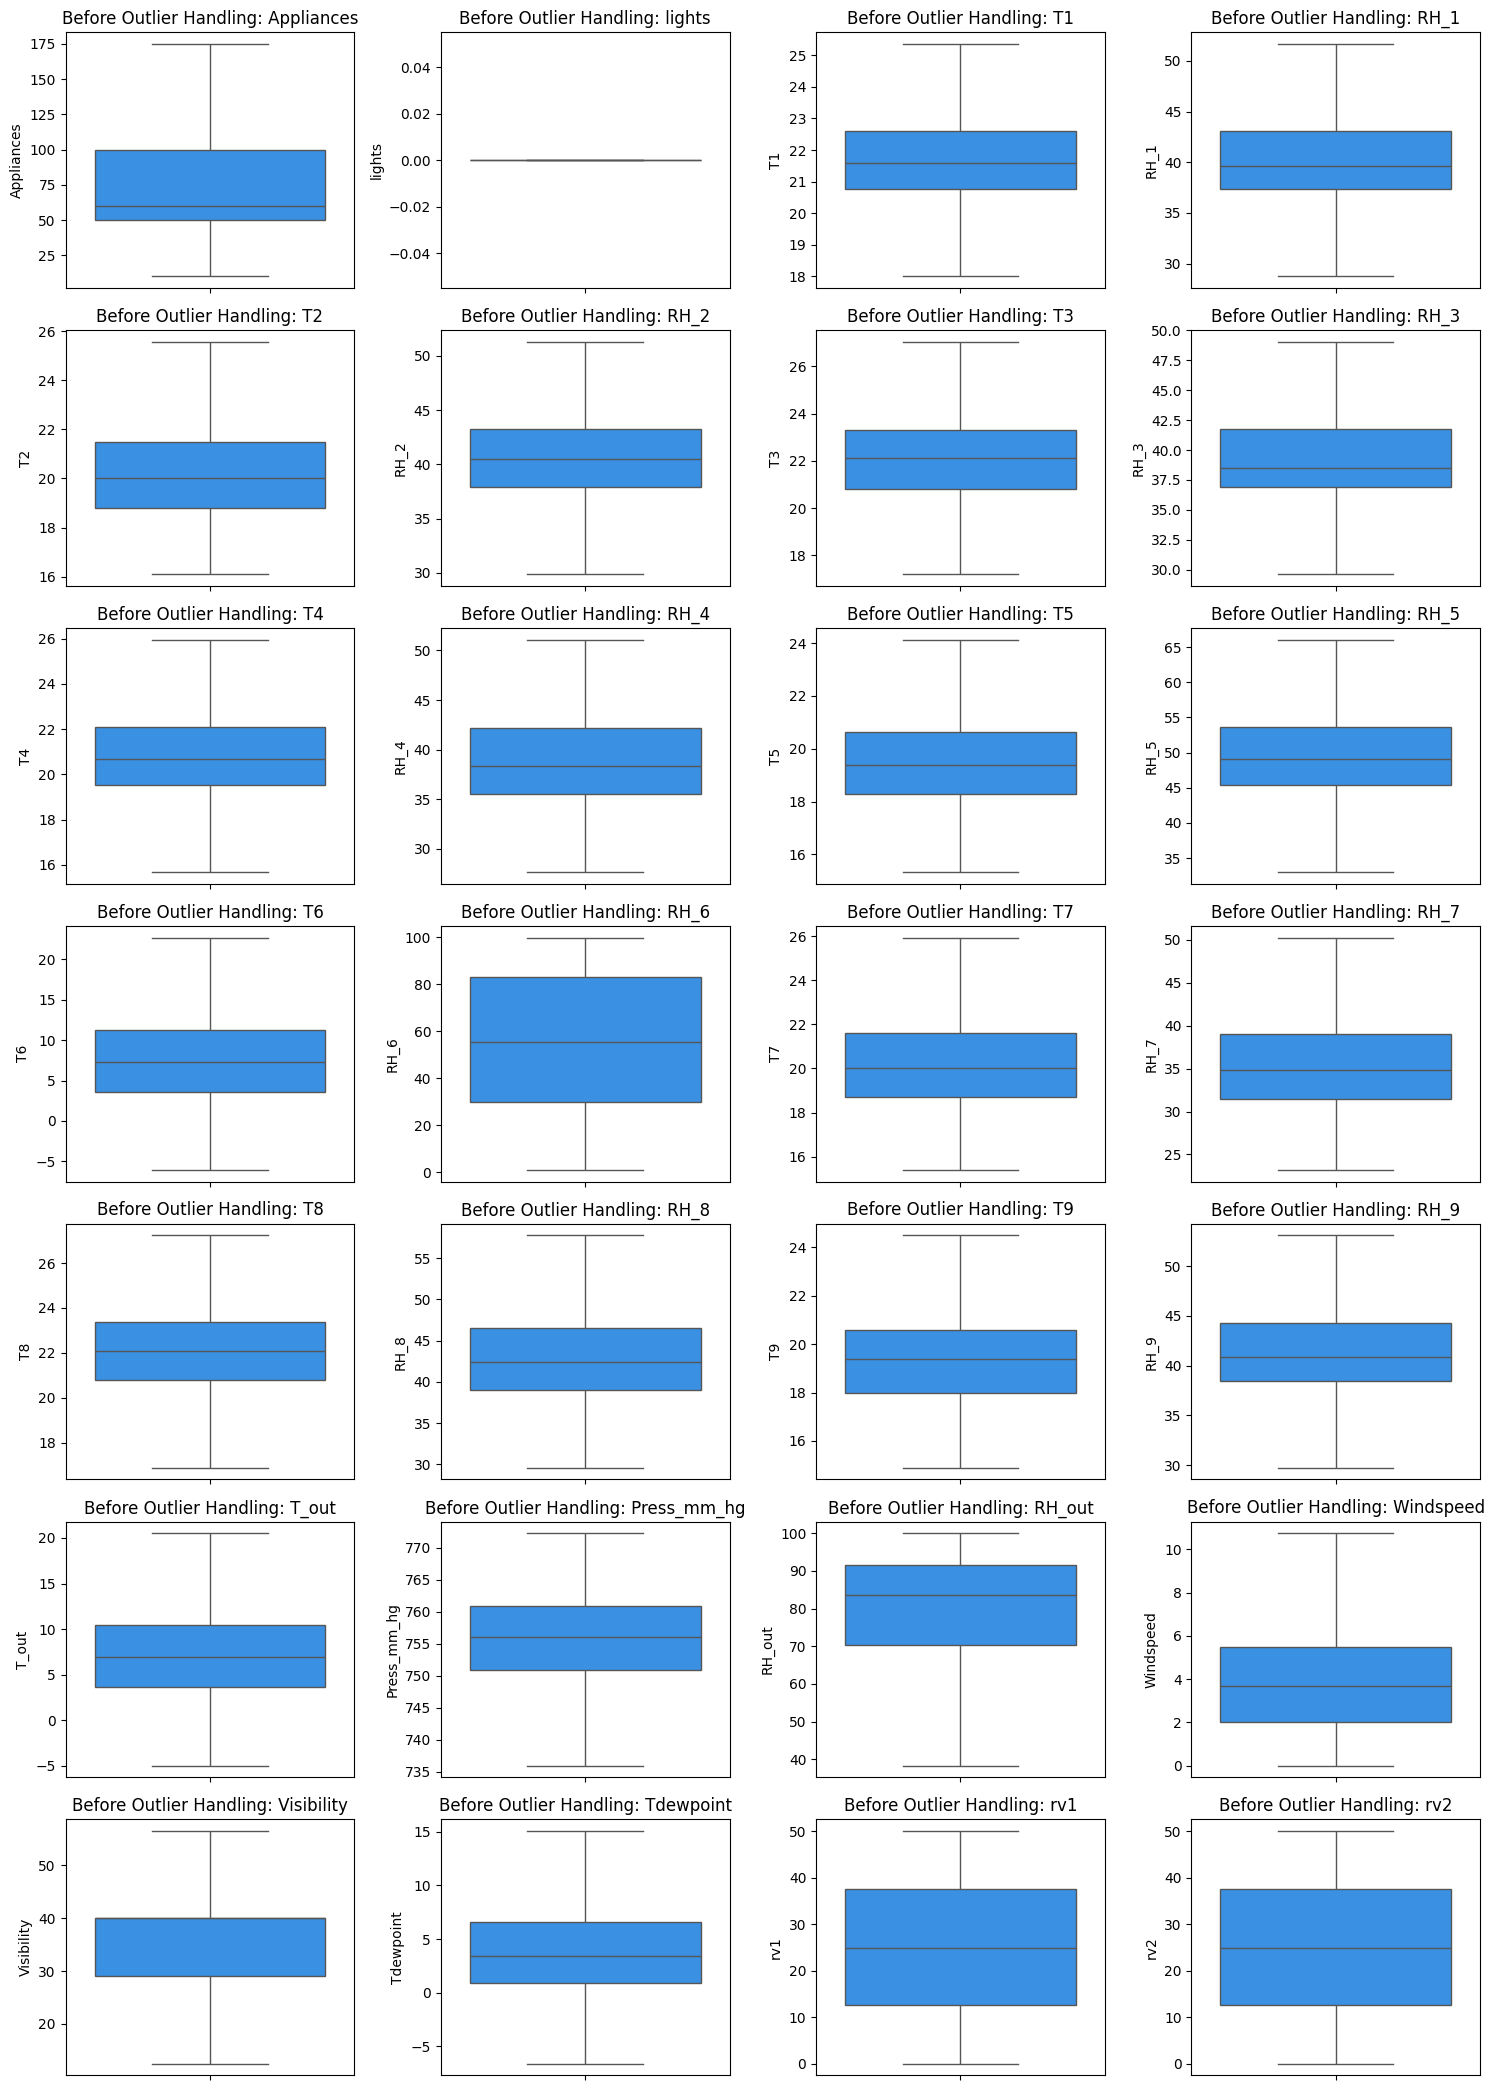

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Calculate number of rows and columns needed for the boxplots
n_cols = 4  # Number of columns per row
n_rows = math.ceil(len(numerical_cols) / n_cols)  # Calculate the required rows

# Plot boxplots for all numerical columns
plt.figure(figsize=(15, n_rows * 3))  # Adjust figure height dynamically
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Adjust subplot position
    sns.boxplot(y=df[col], color='dodgerblue')  # Before outlier handling
    plt.title(f"Before Outlier Handling: {col}")

plt.tight_layout()
plt.show()




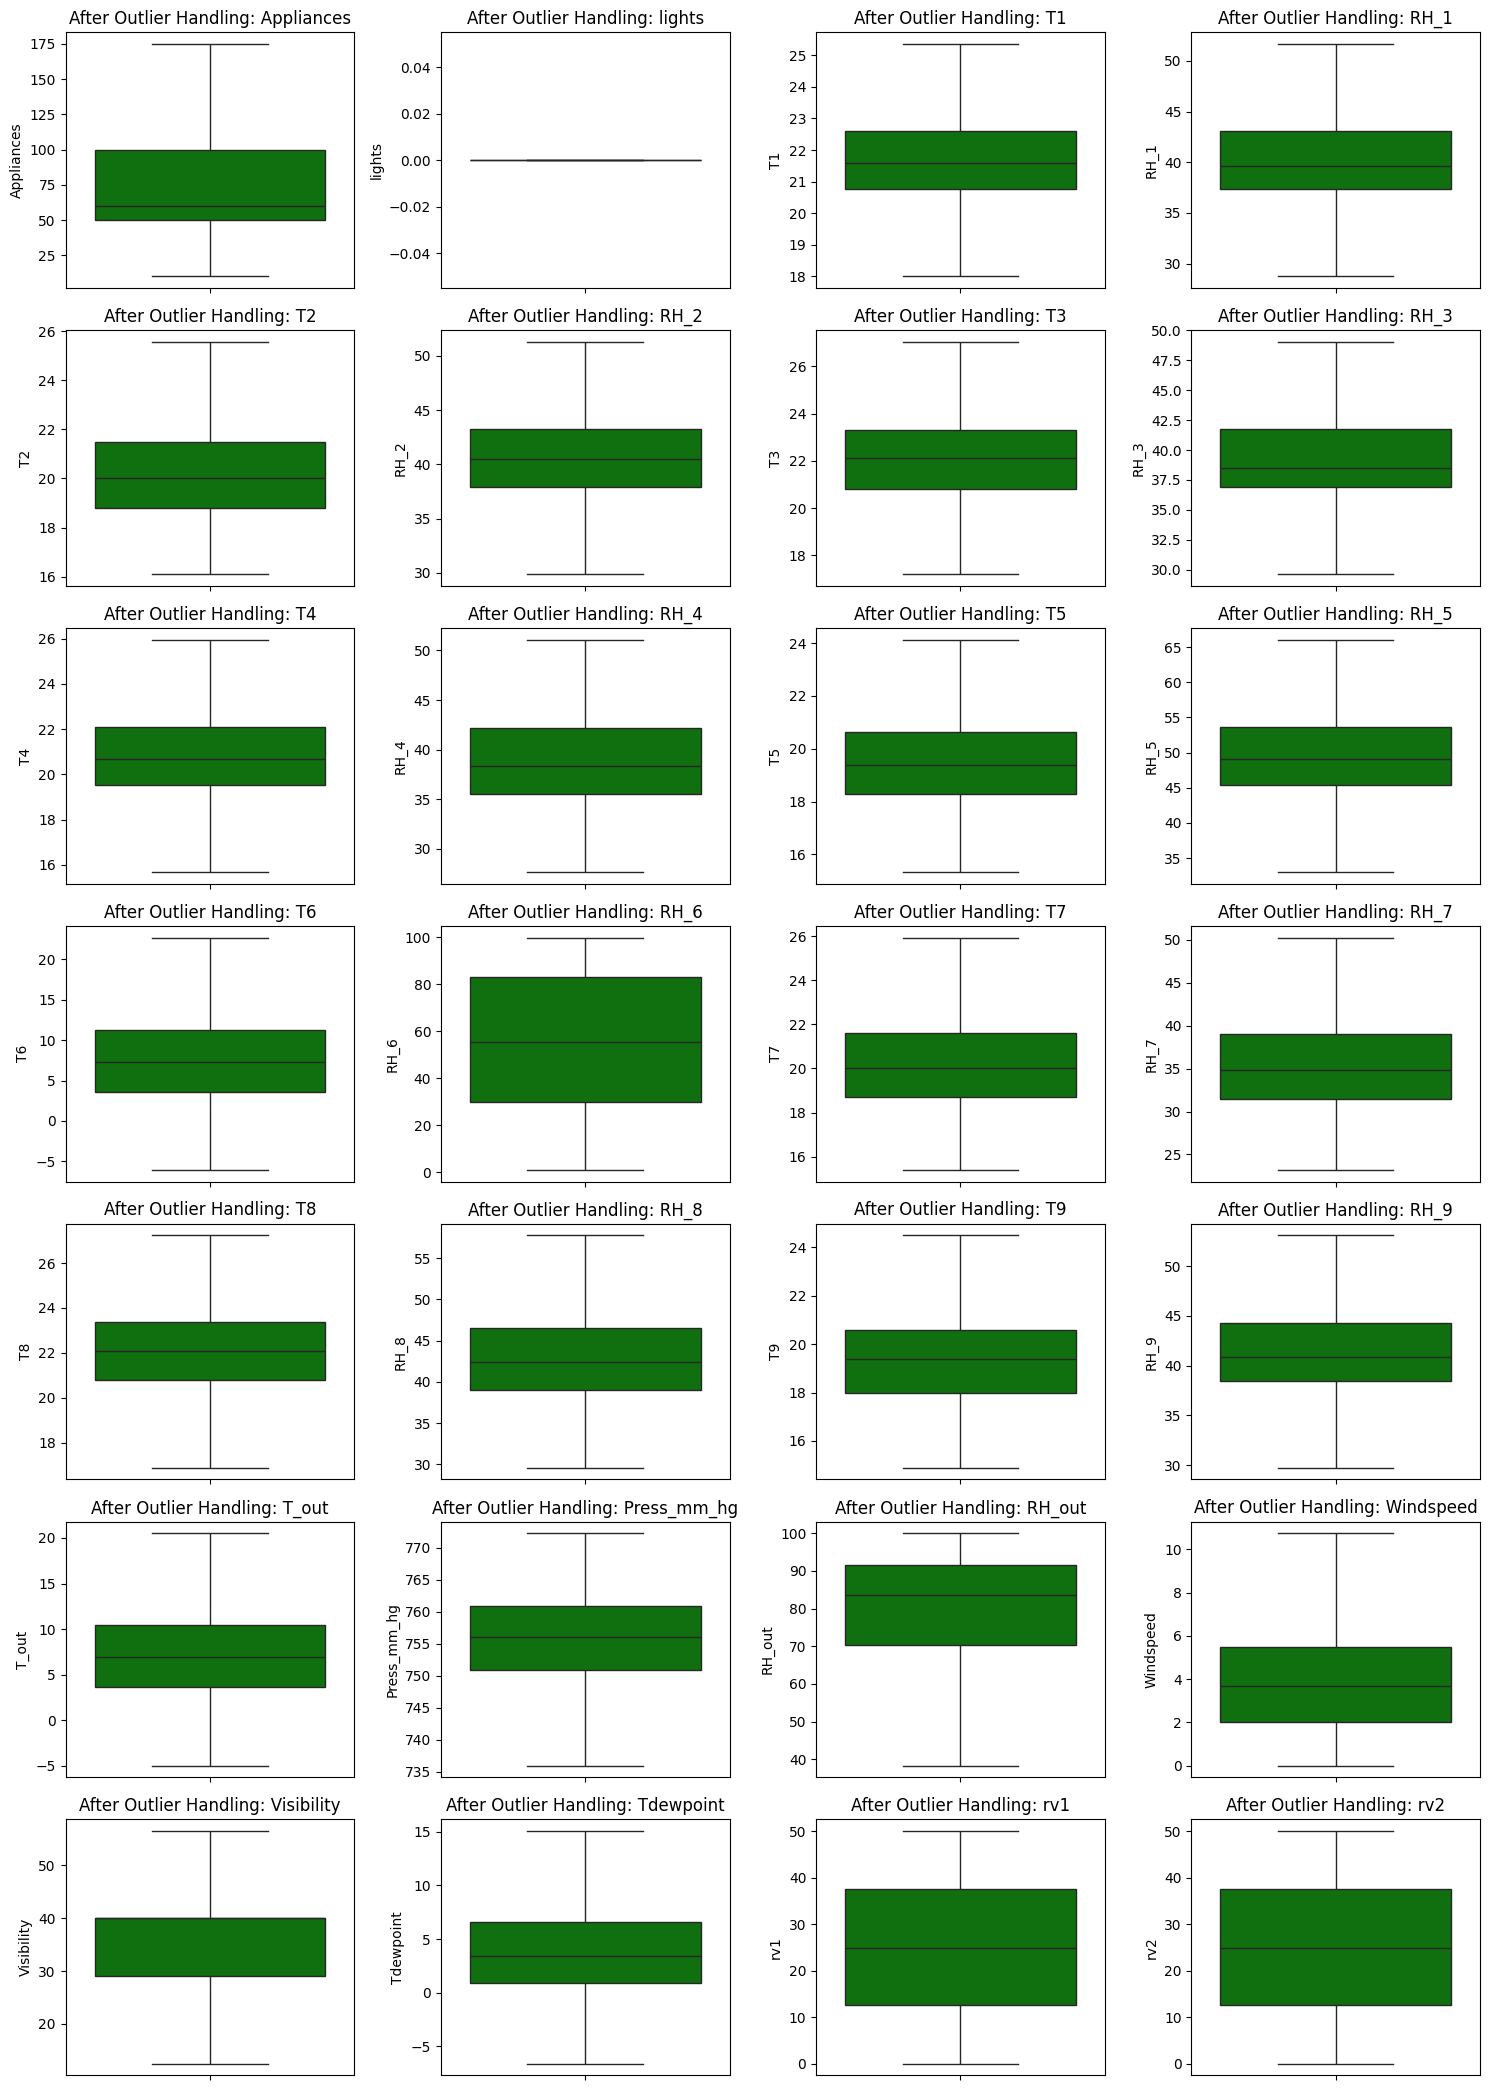

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Calculate number of rows and columns based on the number of numerical columns
n_cols = 4  # Number of columns per row
n_rows = math.ceil(len(numerical_cols) / n_cols)  # Calculate required rows

# Create a figure with the calculated size
plt.figure(figsize=(15, n_rows * 3))  # Adjust figure height dynamically

# Plot boxplots for all numerical columns after outlier handling
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Adjust subplot position dynamically
    sns.boxplot(y=df1[col], color='green')  # Boxplot after outlier handling
    plt.title(f"After Outlier Handling: {col}")

plt.tight_layout()
plt.show()


## **Skewness**

In [65]:
from scipy.stats import skew


# Check skewness of numerical columns
skewed_features = df.select_dtypes(include=['float64', 'int64']).apply(skew)
print("Skewed Features:\n", skewed_features[abs(skewed_features) > 0.5])


Skewed Features:
 Appliances    1.156069
T2            0.634556
T5            0.534036
RH_5          0.734485
RH_out       -0.846189
Windspeed     0.790070
dtype: float64


# **Addressing Skewness** :

In [66]:
skewness = df[num_cols].skew()

# Categorize skewness
no_skewness = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderate_skewness = skewness[(skewness > 0.5) & (skewness <= 1) | (skewness < -0.5) & (skewness >= -1)]
high_skewness = skewness[(skewness > 1) | (skewness < -1)]

# Display results
print("Skewness of Numeric Columns:\n", skewness)
print("\nNo Skewness:\n", no_skewness)
print("\nModerate Skewness:\n", moderate_skewness)
print("\nHigh Skewness:\n", high_skewness)

Skewness of Numeric Columns:
 Appliances     1.156157
lights         0.000000
T1             0.166939
RH_1           0.401822
T2             0.634604
RH_2          -0.146187
T3             0.383435
RH_3           0.466830
T4             0.192775
RH_4           0.444614
T5             0.534076
RH_5           0.734540
T6             0.456428
RH_6          -0.241961
T7             0.254697
RH_7           0.237275
T8            -0.246628
RH_8           0.305941
T9             0.382711
RH_9           0.370684
T_out          0.398211
Press_mm_hg   -0.338726
RH_out        -0.846254
Windspeed      0.790130
Visibility     0.157975
Tdewpoint      0.239017
rv1            0.004945
rv2            0.004945
dtype: float64

No Skewness:
 lights         0.000000
T1             0.166939
RH_1           0.401822
RH_2          -0.146187
T3             0.383435
RH_3           0.466830
T4             0.192775
RH_4           0.444614
T6             0.456428
RH_6          -0.241961
T7             0.254697
RH_7

In [67]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,0,19.89,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,735.933333,92.000000,7.000000,56.500000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,0,19.89,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,735.933333,92.000000,6.666667,56.500000,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,0,19.89,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,735.933333,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,0,19.89,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,735.933333,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,0,19.89,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,735.933333,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.36,46.560000,25.565000,42.025714,27.040000,41.163333,24.700000,...,23.200000,46.7900,20.520833,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.36,46.500000,25.565000,42.080000,27.040000,41.223333,24.700000,...,23.200000,46.7900,20.520833,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,175,0,25.36,46.596667,25.565000,42.768571,27.040000,41.690000,24.700000,...,23.200000,46.7900,20.520833,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,175,0,25.36,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,20.520833,755.200000,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784



# **6.Exploratory Data Analysis (EDA) **

# **Analysing numerical columns**



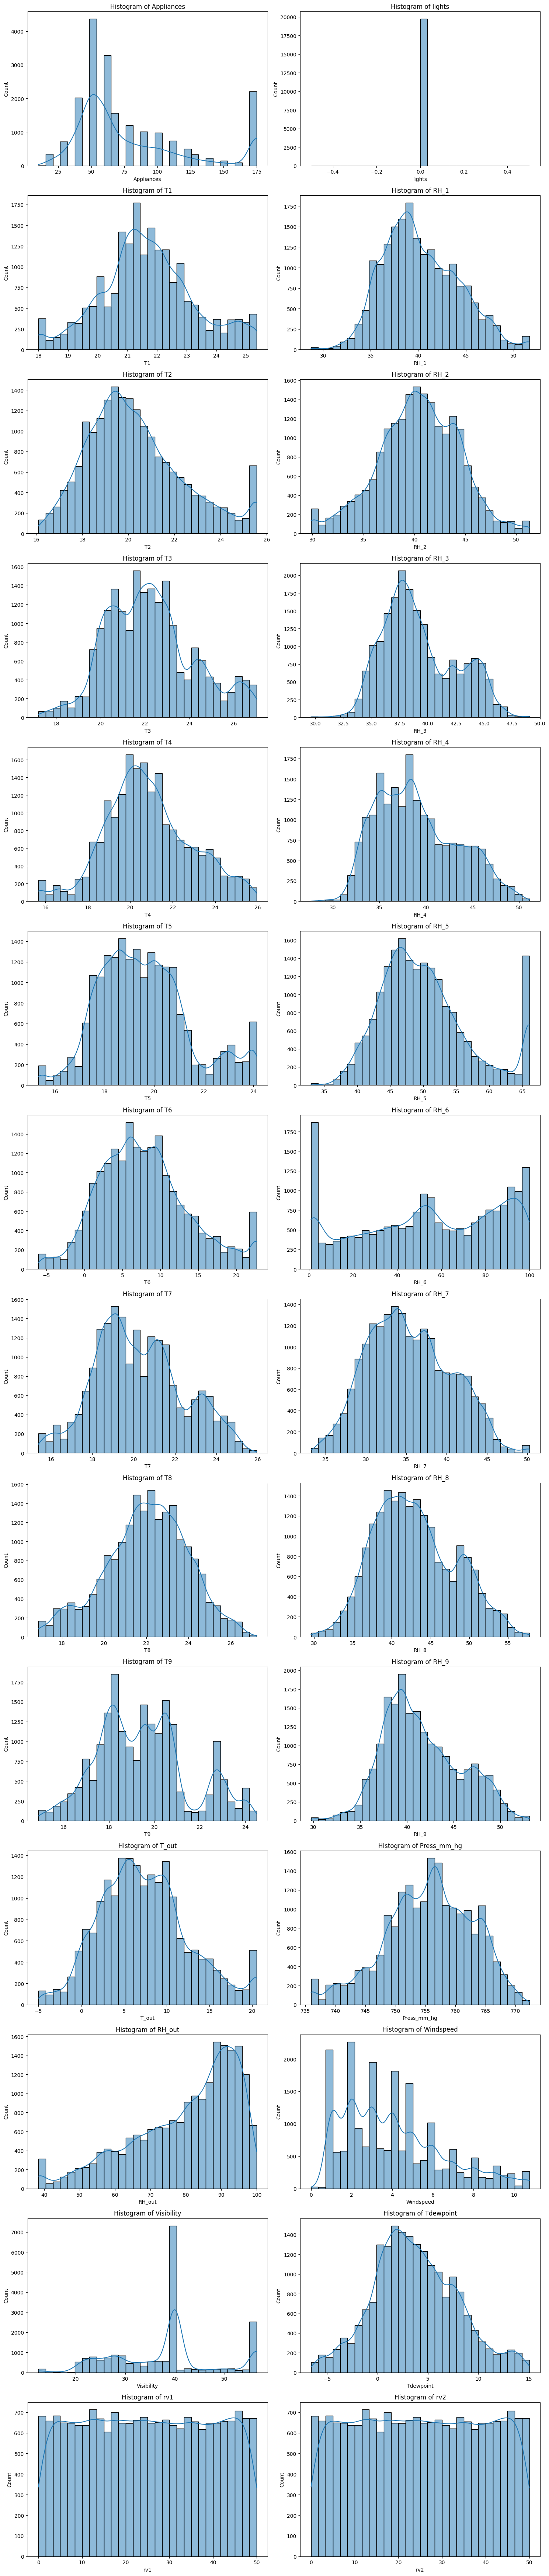

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import math



num_cols = df1.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of columns and rows dynamically
n_cols = 2  # Number of columns per row
n_rows = math.ceil(len(num_cols) / n_cols)  # Calculate the required number of rows

# Create a figure with the calculated size
plt.figure(figsize=(15, n_rows * 5))  # Adjust the height dynamically

# Plot histograms for all numerical columns
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Adjust subplot position dynamically
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


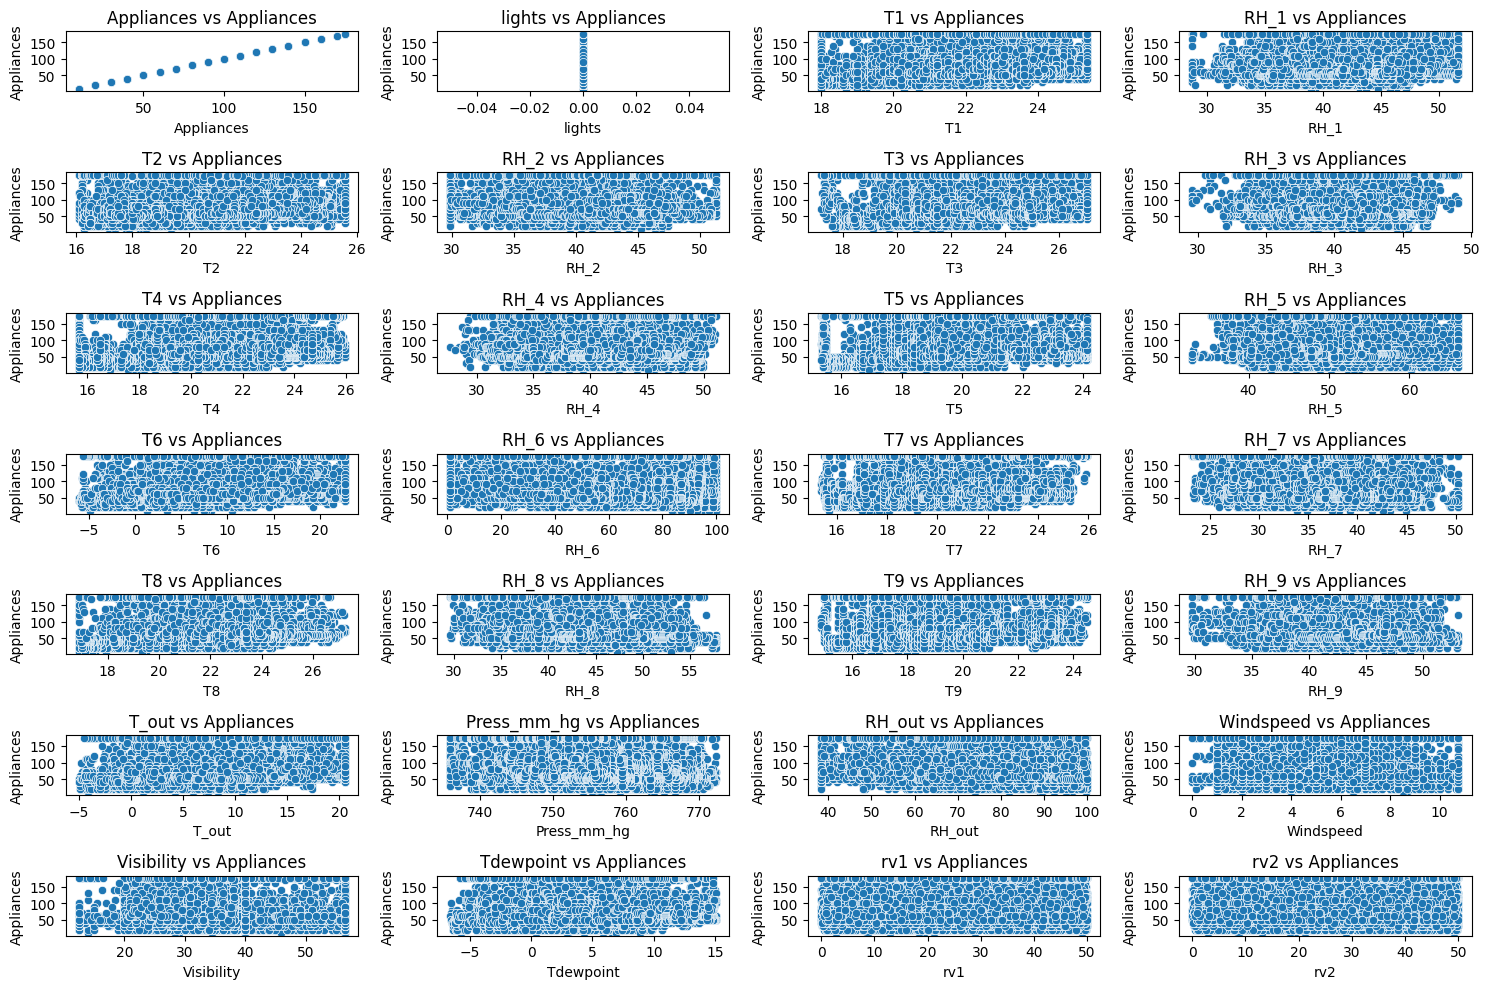

In [33]:
import math

# Number of numerical columns
num_features = len(num_cols)

# Calculate the number of rows and columns needed for subplots
n_cols = 4  # Number of columns (you can adjust this if desired)
n_rows = math.ceil(num_features / n_cols)  # Calculate rows dynamically

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, start=1):
    plt.subplot(n_rows, n_cols, i)  # Dynamically adjust rows and columns
    sns.scatterplot(data=df1, x=col, y='Appliances')
    plt.title(f'{col} vs Appliances')
    plt.xlabel(col)
    plt.ylabel('Appliances')

plt.tight_layout()
plt.savefig("Scatter.png")
plt.show()


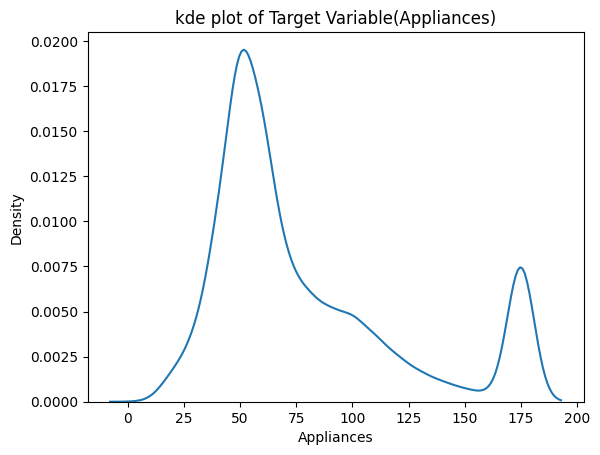

In [34]:
sns.kdeplot(df1.Appliances)
plt.title("kde plot of Target Variable(Appliances)")
plt.show()

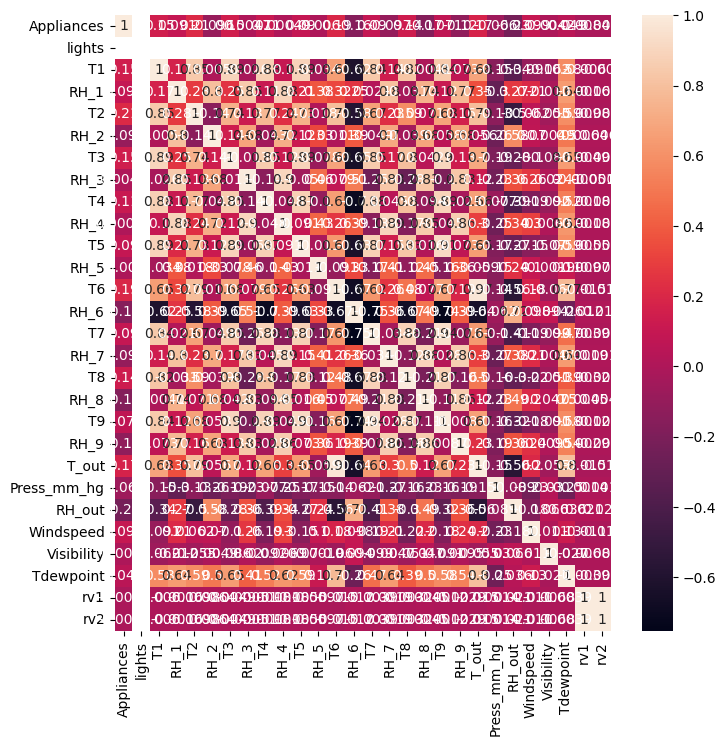

In [35]:
corr1 = df1[num_cols].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr1, annot=True)
plt.savefig("corre.png")
plt.show()

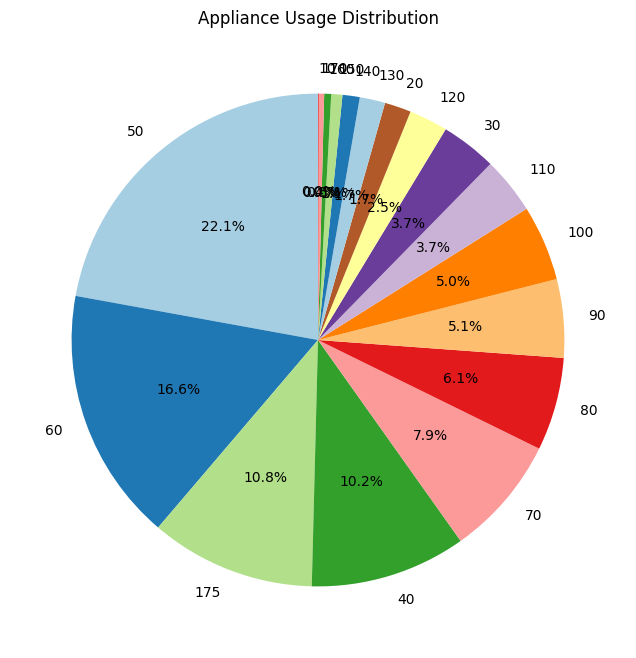

In [36]:
# Count values in each bin
usage_counts = df1['Appliances'].value_counts()

# Create the pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    usage_counts,
    labels=usage_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Appliance Usage Distribution')
plt.show()


<ipython-input-37-462629cd63f4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Appliances', data=df, palette='viridis')


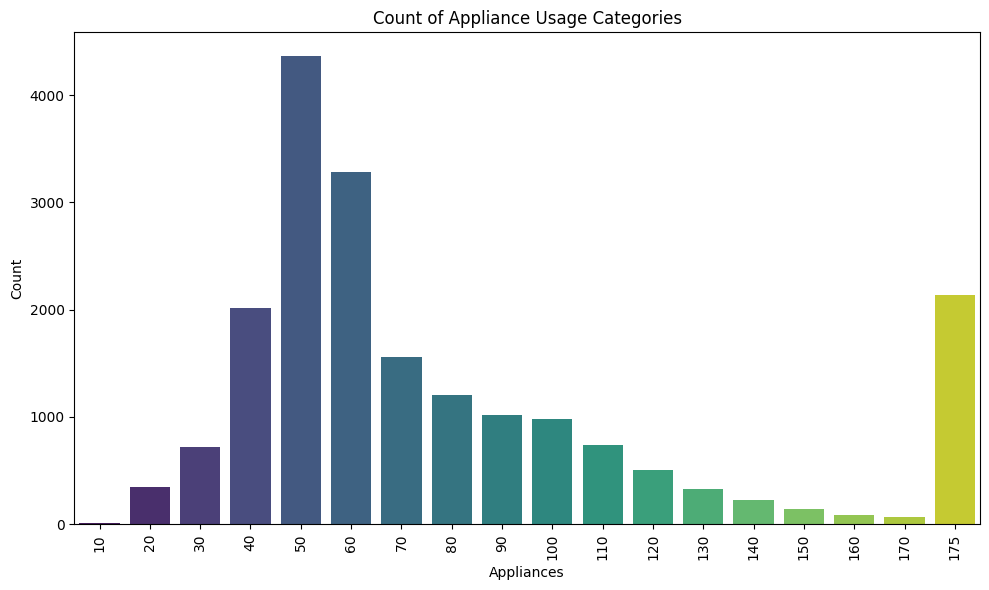

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.countplot(x='Appliances', data=df, palette='viridis')
plt.title('Count of Appliance Usage Categories')
plt.xlabel('Appliances')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


<ipython-input-40-4e135a2d7338>:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['date'] = pd.date_range(start='2016-01-11 17:00:00', periods=len(df), freq='10T')


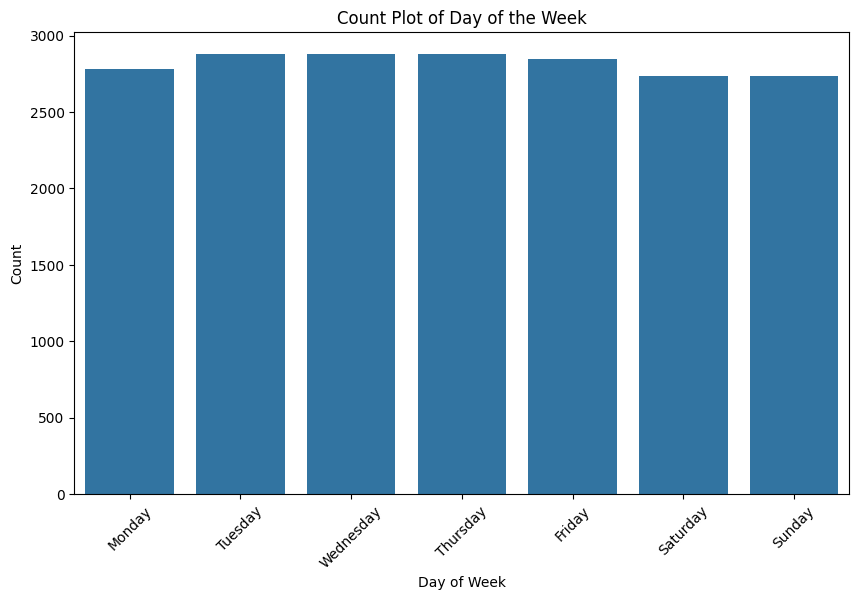

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic date column
# Assuming data starts on '2016-01-11 17:00:00' and is recorded every 10 minutes
df['date'] = pd.date_range(start='2016-01-11 17:00:00', periods=len(df), freq='10T')

# Create 'day_of_week' column
df['day_of_week'] = df['date'].dt.day_name()

# Bar plot for 'day_of_week' distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Count Plot of Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


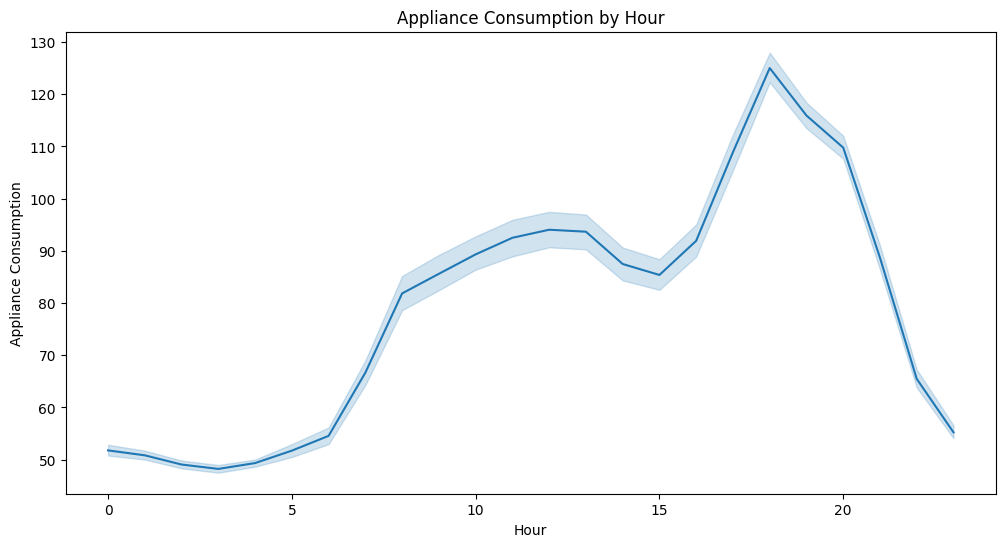

In [41]:
df['hour'] = pd.to_datetime(df['date']).dt.hour

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='Appliances', data=df)
plt.title('Appliance Consumption by Hour')
plt.xlabel('Hour')
plt.ylabel('Appliance Consumption')
plt.show()


#  ***7.*Feature Engineering:**
- Identify and encode categorical features using techniques like one-hot encoding or label
encoding.

In [48]:
from sklearn.preprocessing import LabelEncoder

 #Label Encoder

label_encoder = LabelEncoder()

# Encode the 'Category' column
df['Appliances_encoded'] = label_encoder.fit_transform(df['Appliances'])

print(df.head())


   Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60       0  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60       0  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50       0  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50       0  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60       0  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...  Press_mm_hg  RH_out  Windspeed  Visibility  \
0  19.000000  45.566667  ...   735.933333    92.0   7.000000   56.500000   
1  19.000000  45.992500  ...   735.933333    92.0   6.666667   56.500000   
2  18.926667  45.890000  ...   735.933333    92.0   6.333333   55.333333   
3  18.890000  45.723333  ...   735.933333    92.0   6.000000   51.500000   
4  18.890000  45.530000  ...   735.933333    92.0   5.666667   47.666667   

   Tdewpoint        rv1        rv2  day_of_week  hour  Appliances_encoded 

# ***8 . Feature Selection :  ***

## **Random Forest :


Top Features by Random Forest Importance:
         Feature  Importance
3            T2    0.068745
21       RH_out    0.065848
16         RH_8    0.064144
2          RH_1    0.064061
18         RH_9    0.054703
6          RH_3    0.052784
20  Press_mm_hg    0.049967
14         RH_7    0.045424
15           T8    0.044064
10         RH_5    0.042003
5            T3    0.041988
8          RH_4    0.038940
13           T7    0.035757
7            T4    0.034138
4          RH_2    0.034132
9            T5    0.033372
12         RH_6    0.033239
11           T6    0.032972
24    Tdewpoint    0.032508
1            T1    0.024987
19        T_out    0.024336
17           T9    0.024023
22    Windspeed    0.022051
23   Visibility    0.015719
26          rv2    0.010215
25          rv1    0.009881
0        lights    0.000000


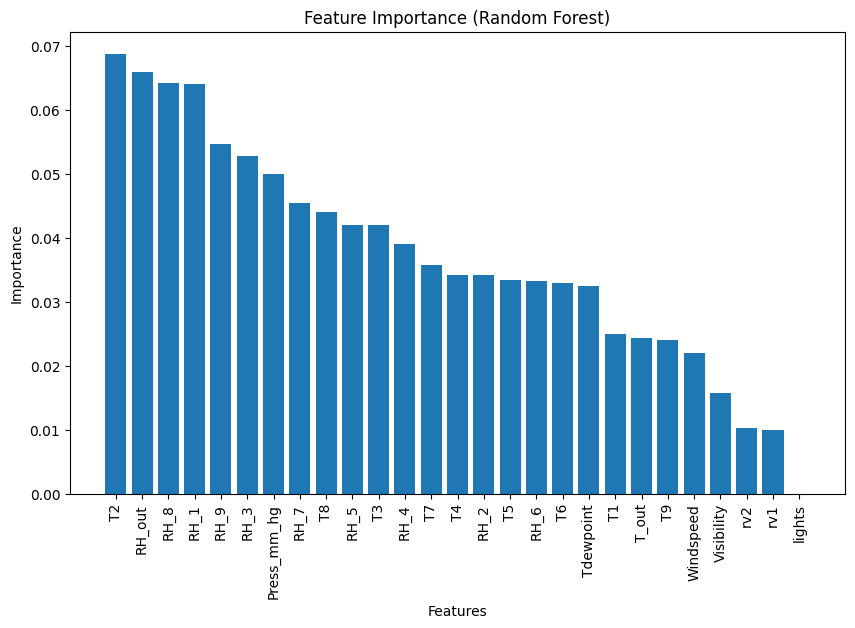

In [68]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt



# Drop 'date' column if present
if 'date' in df.columns:
    df = df.drop(columns=['date'])

# Features and Target
X = df.drop(columns=['Appliances'], axis=1)  # Exclude target column
y = df['Appliances']  # Target column

# Keep only numeric features
X = X.select_dtypes(include=[np.number])

# --- Random Forest Feature Importance ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Combine feature names and importances into a DataFrame
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop Features by Random Forest Importance:\n", importance_df)

# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


## 9 . Split Data into Training and Testing Sets:

In [69]:
from sklearn.model_selection import train_test_split


X = df1.drop('Appliances', axis=1)  # Features
y = df1['Appliances']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")


Training set features shape: (15788, 28)
Testing set features shape: (3947, 28)
Training set target shape: (15788,)
Testing set target shape: (3947,)


# 10. **Feature Scaling:**

#  Standardization

In [70]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Drop 'date' column and prepare features (X) and target (y)
if 'date' in df.columns:
    df = df.drop(columns=['date'])

X = df.drop(columns=['Appliances'])  # Features
y = df['Appliances']  # Target

# Select numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

#Standardization
standard_scaler = StandardScaler()
X_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(X[numerical_features]), columns=numerical_features)

# Display the first few rows of scaled data

print("\nStandardized Data:\n", X_standard_scaled.head())



Standardized Data:
    lights        T1      RH_1        T2      RH_2        T3      RH_3  \
0     0.0 -1.139072  1.863478 -0.528718  1.092582 -1.245155  1.686863   
1     0.0 -1.139072  1.634348 -0.528718  1.075633 -1.245155  1.705307   
2     0.0 -1.139072  1.534580 -0.528718  1.051570 -1.245155  1.749367   
3     0.0 -1.139072  1.475395 -0.528718  1.042363 -1.245155  1.769859   
4     0.0 -1.139072  1.543034 -0.528718  1.027297 -1.245155  1.769859   

         T4      RH_4        T5  ...        T9      RH_9     T_out  \
0 -0.912635  1.506438 -1.319168  ... -1.217324  0.958298 -0.147777   
1 -0.912635  1.604528 -1.319168  ... -1.200778  0.965526 -0.170232   
2 -0.948663  1.580918 -1.319168  ... -1.233869  0.951070 -0.192686   
3 -0.966677  1.542526 -1.319168  ... -1.233869  0.926976 -0.215141   
4 -0.966677  1.497991 -1.301016  ... -1.233869  0.926976 -0.237595   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
0    -2.684267  0.828905   1.226233   

## 11. **Build the ML Model:**

 Regression: SVR, MLP Regressor, Random Forest Regressor, Linear Regression,
Gradient Boost, Adaboost.

In [71]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features (X) and target (y)
X = df.drop(columns=['Appliances'])  # Features
y = df['Appliances']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    "SVR": SVR(),
    "MLP Regressor": MLPRegressor(max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}\n")

# Display results
print("Model Performance Summary:")
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")


Training SVR...
SVR - MSE: 2032.9337, R2: -0.1061

Training MLP Regressor...
MLP Regressor - MSE: 1373.3548, R2: 0.2528

Training Random Forest Regressor...
Random Forest Regressor - MSE: 470.4740, R2: 0.7440

Training Linear Regression...
Linear Regression - MSE: 1346.7894, R2: 0.2672

Training Gradient Boosting...
Gradient Boosting - MSE: 1117.1430, R2: 0.3922

Training AdaBoost Regressor...
AdaBoost Regressor - MSE: 1789.0481, R2: 0.0266

Model Performance Summary:
SVR: MSE = 2032.9337, R2 = -0.1061
MLP Regressor: MSE = 1373.3548, R2 = 0.2528
Random Forest Regressor: MSE = 470.4740, R2 = 0.7440
Linear Regression: MSE = 1346.7894, R2 = 0.2672
Gradient Boosting: MSE = 1117.1430, R2 = 0.3922
AdaBoost Regressor: MSE = 1789.0481, R2 = 0.0266


# 12. **Model Evaluation:**
- Regression Metrics: MAE, MSE, RMSE, R2 Score.

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to evaluate and display metrics for a given model
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}\n")

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, name)



Evaluating SVR...
Model: SVR
  Mean Absolute Error (MAE): 30.1831
  Mean Squared Error (MSE): 2032.9337
  Root Mean Squared Error (RMSE): 45.0881
  R² Score: -0.1061

Evaluating MLP Regressor...
Model: MLP Regressor
  Mean Absolute Error (MAE): 29.3782
  Mean Squared Error (MSE): 1373.3548
  Root Mean Squared Error (RMSE): 37.0588
  R² Score: 0.2528

Evaluating Random Forest Regressor...
Model: Random Forest Regressor
  Mean Absolute Error (MAE): 14.2424
  Mean Squared Error (MSE): 470.4740
  Root Mean Squared Error (RMSE): 21.6904
  R² Score: 0.7440

Evaluating Linear Regression...
Model: Linear Regression
  Mean Absolute Error (MAE): 27.3907
  Mean Squared Error (MSE): 1346.7894
  Root Mean Squared Error (RMSE): 36.6986
  R² Score: 0.2672

Evaluating Gradient Boosting...
Model: Gradient Boosting
  Mean Absolute Error (MAE): 24.5276
  Mean Squared Error (MSE): 1117.1430
  Root Mean Squared Error (RMSE): 33.4237
  R² Score: 0.3922

Evaluating AdaBoost Regressor...
Model: AdaBoost Regre

# **Best Model Selection :**

In [73]:
# Dictionary to store evaluation results
results = {}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Save results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Convert results to DataFrame for easier analysis
import pandas as pd
results_df = pd.DataFrame(results).T

# Display the results for all models
print("\nComparison of All Models:")
print(results_df)

# Find the best model based on R² score
best_model_name = results_df['R2'].idxmax()
best_model_metrics = results_df.loc[best_model_name]

print("\nBest Model:")
print(f"  Model: {best_model_name}")
print(f"  Metrics: \n{best_model_metrics}")

Evaluating SVR...
Evaluating MLP Regressor...
Evaluating Random Forest Regressor...
Evaluating Linear Regression...
Evaluating Gradient Boosting...
Evaluating AdaBoost Regressor...

Comparison of All Models:
                               MAE          MSE       RMSE        R2
SVR                      30.183063  2032.933689  45.088066 -0.106109
MLP Regressor            29.378236  1373.354779  37.058802  0.252765
Random Forest Regressor  14.242361   470.473975  21.690412  0.744017
Linear Regression        27.390719  1346.789387  36.698629  0.267219
Gradient Boosting        24.527557  1117.143003  33.423689  0.392168
AdaBoost Regressor       36.832881  1789.048142  42.297141  0.026588

Best Model:
  Model: Random Forest Regressor
  Metrics: 
MAE      14.242361
MSE     470.473975
RMSE     21.690412
R2        0.744017
Name: Random Forest Regressor, dtype: float64
